In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot') 

# Importing data

In [58]:
# Defining dataframe
df = pd.read_csv('UberDataset.csv')

In [59]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [60]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


Apparently, we have an unnecessary record in the index 1155. Thus we are going to drop them.

In [61]:
# Droping record with index 1155
df.drop(index=1155, axis=0, inplace=True)

In [62]:
# Checking data
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [63]:
# Checking datatypes
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

- We have the `START_DATE` and the `END_DATE` column in our data that consists of the date and timestamp of each Uber trip.
- These columns are still having `object` datatypes.
- To ease our analysis, we are going to change their data types from object to datetime.

## Converting necessary column to datetime object

In [64]:
# Converting START_DATE datatypes  (# infer_datetime_format=True, utc=True)
df['START_DATE'] = pd.to_datetime(df['START_DATE'])  

# Converting END_DATE datatypes
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [65]:
# Checking changes
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

- Okay so now all columns have their data types the way we desired.
- However, we are going to rename columns `START` and `STOP` to `START_POINT` and `STOP_POINT` respectively so that it can be more self-explaining.

## Renaming columns

In [66]:
# Renaming columns
df.rename(columns={'START': 'START_POINT', 'STOP': 'STOP_POINT'}, inplace=True)

In [67]:
# Checking dataframe
df

,START_DATE,END_DATE,CATEGORY,START_POINT,STOP_POINT,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


# Cleaning the data

## Checking duplicated values

Creating function to check and remove duplicates.

In [68]:
# Creating function to check and remove duplicates
def duplicateVal(df):
    # Checking shape before dropping duplicates
    before_drop = df.shape
    print(f'shape before dropping duplicate: {before_drop}')

    # Calculating total duplicated data
    total_duplicate = df.duplicated().sum()
    print(f'Total duplicated records: {total_duplicate}')

    # Dropping duplicated data
    df = df.drop_duplicates()

    # Checking shape after dropping duplicates
    after_drop = df.shape
    print(f'shape before dropping duplicate: {after_drop}')
    
    # Returning dataframe after droping duplicate
    return df

In [69]:
df = duplicateVal(df)

shape before dropping duplicate: (1155, 7)
Total duplicated records: 1
shape before dropping duplicate: (1154, 7)


Okay we have dropped the duplicated values

## Checking missing values

In [70]:
# Creating function to check null values
def missVal(data):
    # Calculating total missing values in each column
    total = data.isna().sum().sort_values(ascending=False)
    
    # Calculating missing value percentage in each column
    percent = total/len(data)
    
    # Returning result
    return pd.concat([total, percent], keys=['Total', 'Missing Persentage'], axis=1)

In [71]:
# Checking null values
missVal(df)

,Total,Missing Persentage
PURPOSE,502,0.435009
START_DATE,0,0.000000
END_DATE,0,0.000000
CATEGORY,0,0.000000
START_POINT,0,0.000000
STOP_POINT,0,0.000000
MILES,0,0.000000


- Okay so we only have 1 column that has missing values and that is the `PURPOSE` column which has a total of 502 missing values or there are ~43% data missing.
- Let's zoom in on the `PURPOSE` column.

In [72]:
# Checking unique values in column PURPOSE
df['PURPOSE'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

- It looks like the `PURPOSE` column is just the detail or the note associated with the `CATEGORY` column.

In [73]:
# Checking PURPOSE and CATEGORY columns unique values individually
to_check = ['CATEGORY', 'PURPOSE']
for col in to_check:
    print(df[col].value_counts())
    print('')

Business    1077
Personal      77
Name: CATEGORY, dtype: int64

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64



In [74]:
# Checking PURPOSE and CATEGORY columns combined unique values
df[['CATEGORY', 'PURPOSE']].value_counts().sort_index(level=0, ascending=True)

CATEGORY  PURPOSE        
Business  Airport/Travel       3
          Between Offices     18
          Customer Visit     101
          Errand/Supplies    128
          Meal/Entertain     160
          Meeting            186
          Temporary Site      50
Personal  Charity ($)          1
          Commute              1
          Moving               4
dtype: int64

- Actually, we can fill in the missing values in the `PURPOSE` column later by looking at some pattern in each `PURPOSE` category.
- Or, other best practices suggest that missing values can be filled with 'UNKNOWN' value.
- We also get additional information that `PURPOSE` column has rare values like `Charity`, `Commute`, `Moving`, `Airport/Travel`, and `Between Offices`
- In the context of preparing data for machine learning, we have to do something with these rare values, as it can cause troubles and worsen the model performance in the future.
- However, as my purpose for this session is to analyze and visualize the data, I will not take action on the missing values and the rare values.

## Checking inconsistent data input (Categorical data)

In [75]:
# Checking data types
df.dtypes

START_DATE     datetime64[ns]
END_DATE       datetime64[ns]
CATEGORY               object
START_POINT            object
STOP_POINT             object
MILES                 float64
PURPOSE                object
dtype: object

In [76]:
# Checking categorical/str data unique values
for col in df.columns:
    if df[col].dtypes == object:
        print(df[col].value_counts())
        print('')

Business    1077
Personal      77
Name: CATEGORY, dtype: int64

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START_POINT, Length: 177, dtype: int64

Cary                 202
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP_POINT, Length: 188, dtype: int64

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64



- As we can see from the previous code and the code above, the `CATEGORY` and the `PURPOSE` columns already have consistent data input.
- However, we have to see the details of how the data in the `START_POINT` and `STOP_POINT` columns are inputted.

In [77]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Display the value counts for the 'START_POINT' column
print(df['START_POINT'].value_counts().sort_index())

# Reset the display option to the default value
pd.reset_option('display.max_rows')

Agnew                           4
Almond                          1
Apex                           17
Arabi                           1
Arlington                       1
Arlington Park at Amberly       1
Asheville                       2
Austin                          1
Banner Elk                      8
Bellevue                        1
Berkeley                       16
Boone                           2
Briar Meadow                    1
Bryson City                     5
Burtrose                        1
CBD                             4
Capitol One                     2
Cary                          201
Central                         8
Chalmette                       1
Chapel Hill                     2
Chessington                     2
College Avenue                  1
Colombo                         8
Columbia Heights                1
Congress Ave District           1
Connecticut Avenue              1
Convention Center District      1
Cory                            1
Couples Glen  

In the **START_POINT** column, the values below are inconsistent. They are supposed to be one value because they refer to the same location.

- Kar?chi and Karachi are supposed to be **Karachi** (a city in Pakistan)
- R?walpindi and **Rawalpindi** are supposed to be Rawalpindi (a city in Pakistan)

In [78]:
# Let's see how much of this inconsistent data
incons_data = ['Kar?chi', 'R?walpindi']
df.loc[df['START_POINT'].isin(incons_data), 'START_POINT'].value_counts()

Kar?chi       27
R?walpindi    11
Name: START_POINT, dtype: int64

In [79]:
# Consistening values in the START_POINT column
df['START_POINT'].replace({
    'Kar?chi': 'Karachi',
    'R?walpindi': 'Rawalpindi'
}, inplace=True)

C:\Users\meetp\AppData\Local\Temp\ipykernel_4736\1860853087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_POINT'].replace({


# EDA
- How many Uber trips occurred during the timestamp in the dataset?
- What is the median for daily, weekly and monthly total trips?
- How is the customer segment proportion? 
- What are the favorite pick-up spots for each segment?
- How is the hourly trend for Uber trips?
- How is the daily trend for Uber trips?
- How is the monthly trend for Uber trips?
- Is there any specific characteristic of each segment based on the travel duration?

# How many Uber trips occurred during the timestamp in the dataset?

In [84]:
# Extracting dataset timestamp
record_begin = df['START_DATE'].min()
record_end = df['START_DATE'].max()
print(f'The record start from: {record_begin}')
print(f'The record end in: {record_end}')

The record start from: 2016-01-01 21:11:00
The record end in: 2016-12-31 22:08:00


In [85]:
# Extracting how much trip recorded in the dataset
print(f'Total trips recorded: {len(df)} trips')

Total trips recorded: 1154 trips


### Insights

- The data records 1154 trips
- The data start to record trips from 1 Jan 2016 to 31 Dec 2016 (1-year timestamp)

# What is the median for daily and monthly total trips?

In [86]:
# Copying dataframe
median_trip_data = df.copy()

In [87]:
median_trip_data['Day']  = median_trip_data['START_DATE'].dt.strftime('%H')    
median_trip_data['MONTH'] = median_trip_data['START_DATE'].dt.strftime('%b') 
median_trip_data['DATE'] = median_trip_data['START_DATE'].dt.strftime('%Y-%m-%d')

median_trip_data.head(2)

,START_DATE,END_DATE,CATEGORY,START_POINT,STOP_POINT,MILES,PURPOSE,Day,MONTH,DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Jan,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,01,Jan,2016-01-02


In [88]:
# Calculating median of total orders per day
median_trip_per_day = median_trip_data.groupby(['DATE']).size().median()

# Calculating median of total orders per day
median_trip_per_week = median_trip_data.groupby(['Day']).size().median()

# Calculating median of total orders per month
median_trip_per_month = median_trip_data.groupby(['MONTH']).size().median()


print(f'Median of total orders per day: {median_trip_per_day} orders')
print(f'Median of total orders per Week: {median_trip_per_week} orders')
print(f'Median of total orders per month: {median_trip_per_month} orders')

Median of total orders per day: 3.5 orders
Median of total orders per Week: 51.0 orders
Median of total orders per month: 109.5 orders


### Insights
In 2016, there were approximately


- 4 orders each day (based on median measurement) or we can say that there is 1 order for every 6-hour
- 51 order per week (based on median measurement) or we can say more than 7 orders per day
- 110 orders each month (based on median measurement)

# How is the customer segment proportion?

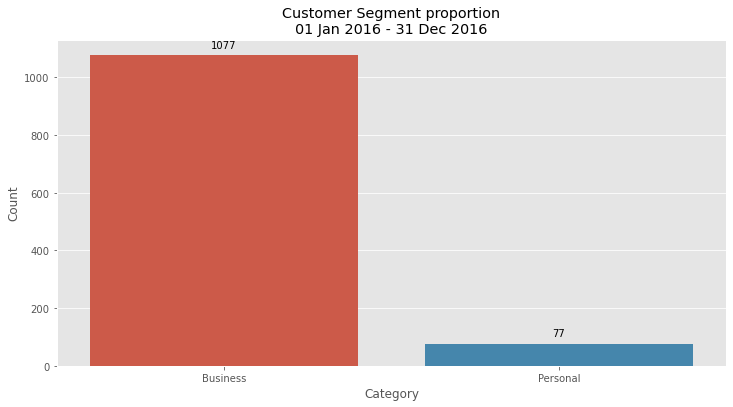

In [89]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Use countplot to plot and annotate to add data labels
ax = sns.countplot(x='CATEGORY', data=df)
ax.set(xlabel='Category', ylabel='Count', title='Customer Segment proportion\n01 Jan 2016 - 31 Dec 2016')

# Add count numbers at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

As we can see from the previous insights, the customer segments are divided into more detailed segmentation with the help of the `PURPOSE` column. So let's see its distribution.

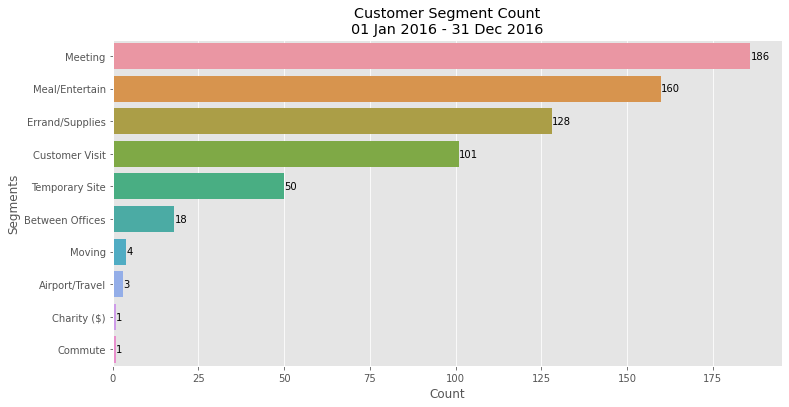

In [90]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Use barplot to plot
ax = sns.barplot(x=df['PURPOSE'].value_counts().values, y=df['PURPOSE'].value_counts().index)

# Customize the plot
plt.title('Customer Segment Count\n01 Jan 2016 - 31 Dec 2016')
plt.xlabel('Count')
plt.ylabel('Segments')

# Add count numbers at the top of each bar
for i, v in enumerate(df['PURPOSE'].value_counts().values):
    ax.text(v, i, f'{v}', va='center', fontsize=10, color='black')

plt.show()

### Insights

- Throughout 2016, **1077 Uber Drives for Business purposes**, compared to **only 77 Uber Drives were for Personal use**.
- The top 3 purpose for our customers to order Uber is Meeting, Meal/Entertain, and Errand/Supplies, all of which lies in the category of Business.
- If from the very first start, the company does prioritize targeting business people, this result wouldn't be so much of a concern. However, if the company also indeed target Personal use customer, this result is concerning and thus needs to be investigated more.

# What are the favorite pick-up spots for each segment?

In [ ]:
# Extracting axes size
len(df['PURPOSE'].value_counts())

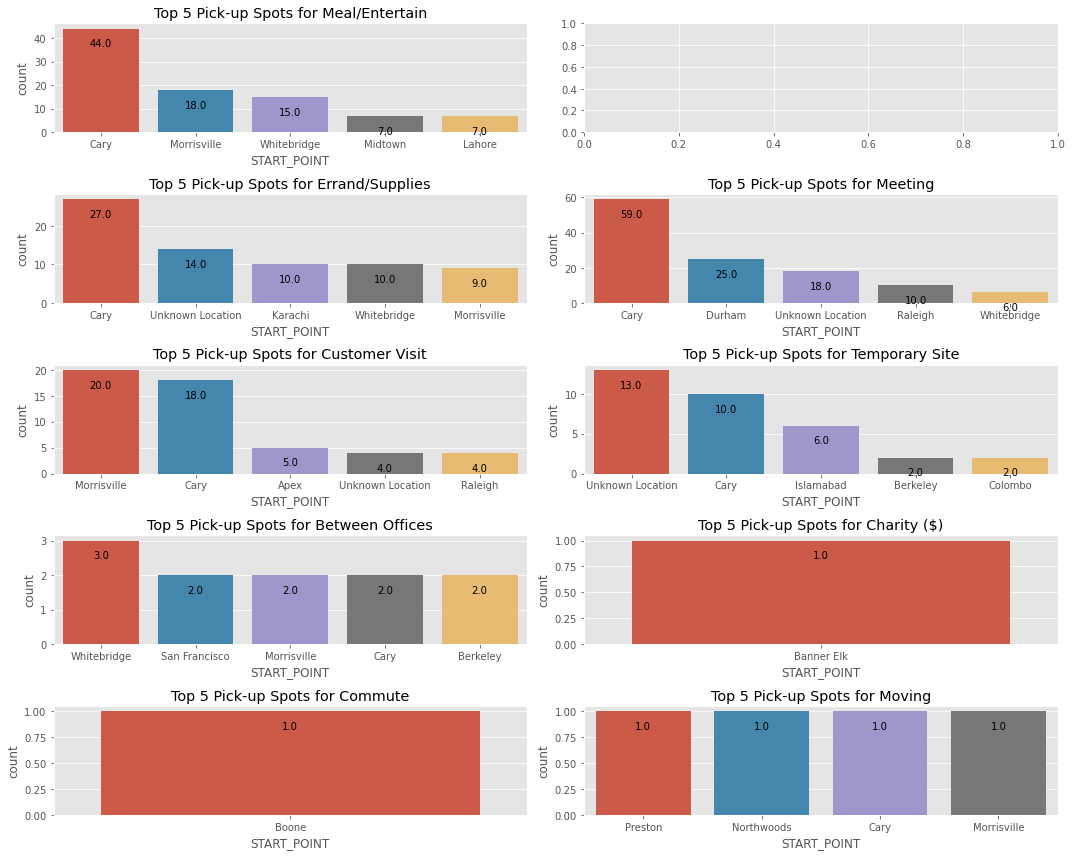

In [50]:
# Creating figure and axes object
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))

# Flatten the axs array
axs = axs.flatten()

# Extracting PURPOSE column categories
cat = df['PURPOSE'].unique()

# Zipping ax and categories
pair = tuple(zip(axs, cat))

# Plotting
for ax, cat in pair:
    if type(cat) == float:
        continue
    else:
        data = df.groupby(['PURPOSE', 'START_POINT']).size().reset_index(name='count').sort_values(by='count', ascending=False)
        sns.barplot(
            data=data.loc[data['PURPOSE'] == cat].head(5),
            x='START_POINT',
            y='count',
            ax=ax
        )
        ax.set_title(f'Top 5 Pick-up Spots for {cat}')

        # Add data labels under each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='top', xytext=(0, -10), textcoords='offset points')

plt.tight_layout()
plt.show()

### Insights

Now we can correlate this information with our previous insight. For example

- At 5 a.m., drivers can stand by at Carry, Durham, Morrisville, or Whitebridge because the possibility of getting an order is great at that time and place. (Remember our insights on the previous question which states that, at 5 a.m. the order possibilities only come from customers who have a Meeting purpose or Meal/Entrtain purpose.
- This information also helps Uber and its drivers understand the customer's behaviors, specifically their location-ordering behavior.

# How is the hourly trend for Uber trips?

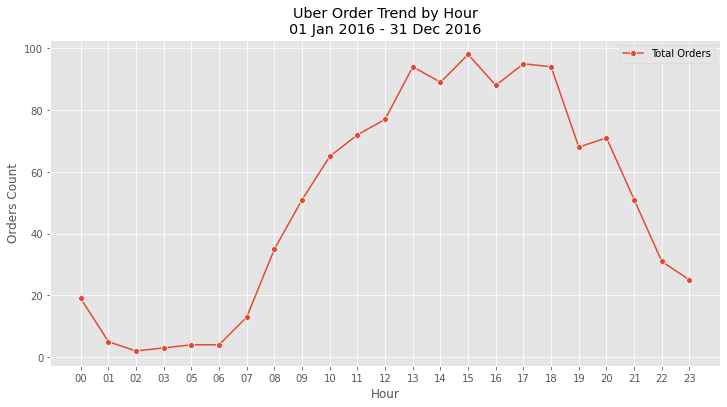

In [51]:
# Copy dataset
hourly_data = df.copy()

# Crete hour column
hourly_data['HOUR'] = hourly_data['START_DATE'].apply(lambda x: x.strftime('%H'))

# Counting data in each column
hourly_data_count = hourly_data.groupby(['HOUR']).size().reset_index(name='COUNT')

# Plotting trend

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Ploting
sns.lineplot(
    data = hourly_data_count,
    x = 'HOUR',
    y = 'COUNT',
    ax = ax,
    label = 'Total Orders',
    marker = '.',
    markersize = 12
)

# Customizing
ax.set_title('Uber Order Trend by Hour\n01 Jan 2016 - 31 Dec 2016')
ax.set_ylabel('Orders Count')
ax.set_xlabel('Hour')

plt.show()

### Insights
- The orders start to increase at 6 a.m.
- There are a relatively high amount of orders starting from 1 pm to 6 pm.
- Apparently, there was no Uber order made at the time interval 4 a.m. - 5 a.m. in 2016.

# How is the Day wise trend for Uber trips?

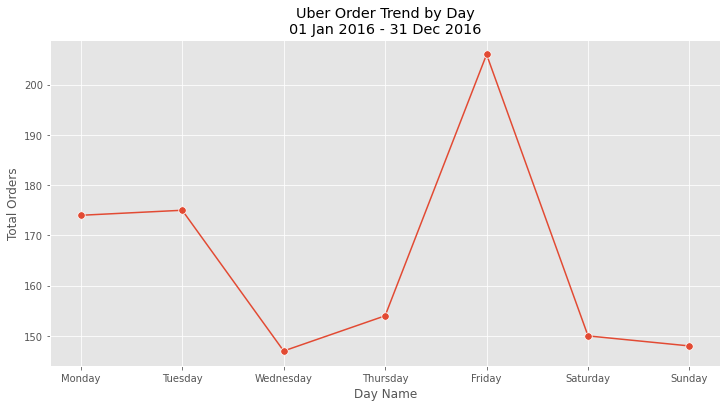

In [52]:
# Copying dataframe
daily_trend = df.copy()

# Creating column dayname
daily_trend['DAYNAME'] = daily_trend['START_DATE'].apply(lambda x: x.strftime('%A'))

# Counting orders per dayname
daily_trend = daily_trend.groupby(['DAYNAME']).size()

# Creating day name order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting
sns.lineplot(
    x = daily_trend.loc[day_order].index,
    y = daily_trend.loc[day_order].values,
    ax = ax,
    marker = '.',
    markersize = 15
)

# Customizing
ax.set_title('Uber Order Trend by Day\n01 Jan 2016 - 31 Dec 2016')
ax.set_xlabel('Day Name')
ax.set_ylabel('Total Orders')

plt.show()

### Insights
- Surprisingly, orders are less likely to occur on Wednesdays than on weekend days.
- Orders are skyrocketing on Friday.
- Low orders on the weekend can be associated with the customer segment proportion which implies ~93% of customers are ordering Uber for business purposes.

# How is the monthly trend for Uber trips?

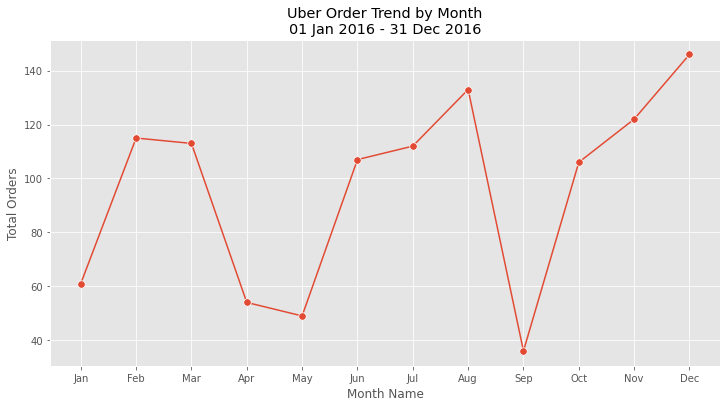

In [53]:
# Copying dataframe
monthly_trend = df.copy()

# Creating column month
monthly_trend['MONTH'] = monthly_trend['START_DATE'].apply(lambda x: x.strftime('%b'))

# Counting orders per month
monthly_trend = monthly_trend.groupby(['MONTH']).size()

# Creating month name order
month_order = [
    'Jan', 
    'Feb', 
    'Mar', 
    'Apr', 
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
]

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting
sns.lineplot(
    x = monthly_trend.loc[month_order].index,
    y = monthly_trend.loc[month_order].values,
    ax = ax,
    marker = '.',
    markersize = 15
)

ax.set_title('Uber Order Trend by Month\n01 Jan 2016 - 31 Dec 2016')
ax.set_xlabel('Month Name')
ax.set_ylabel('Total Orders')

plt.show()

### Insights
- The orders are increasing and considered in the relatively high amount in Q1.
- The orders are declining at the beginning of Q2 but increase at the end of the quarter.
- In Q3, it increased at the beginning of the quarter, however, it declined steeply at the end of the quarter.
- And the order experienced a good increasing trend in the last quarter (Q4).

# Is there any specific characteristic of each segment based on the travel duration?

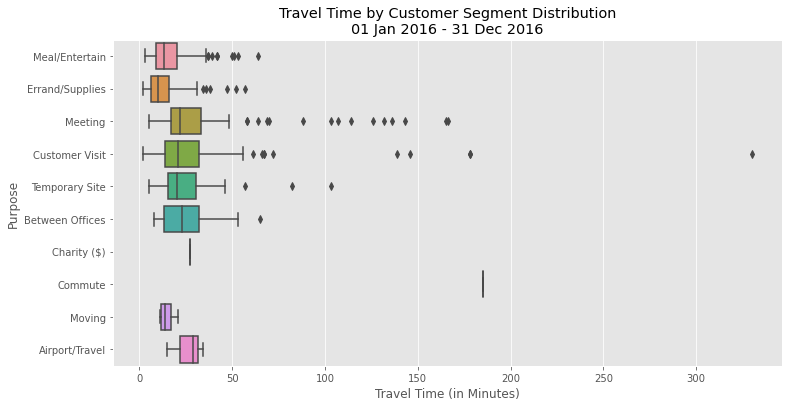

In [55]:
# Copying dataframe
travel_time = df.copy()

# Creating column duration
travel_time['DURATION'] = (travel_time['END_DATE'] - travel_time['START_DATE']).dt.total_seconds()/60

# Plotting
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(
    x = travel_time['DURATION'], 
    y = travel_time['PURPOSE'],
    ax = ax
)

# Customizing
ax.set_title('Travel Time by Customer Segment Distribution\n01 Jan 2016 - 31 Dec 2016')
ax.set_xlabel('Travel Time (in Minutes)')
ax.set_ylabel('Purpose')

plt.show()

### Insights
- We can see that our trip duration data also consists of many outliers.
- On the median, customers who have Errand/Supplies purpose tend to have relatively low travel duration.
- Customers with Meal/Entertain purposes have relatively low travel duration compared to other purposes in the Business category.
- On a median, customers who have Meetings, Customer Visits, Temporary Sites, and Between Offices purposes have similar travel duration.
- Customers who have Customer Visit purposes have relatively higher variability than the other purposes.

## Closing statement.

Thanks for taking the time to read this notebook. Your support and engagement mean a lot to me. Mistakes are part of the learning process, and I appreciate any feedback or insights you have to offer.

As I continue on my data science journey, I'll carry your encouragement with me. Together, we'll explore new horizons and unlock the mysteries of our data-driven world.

It's been a pleasure sharing this adventure with you. Looking forward to crossing paths again soon!